In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [4]:
df_2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [5]:
df_2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [6]:
df_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [7]:
df_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [8]:
df_2019.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


# Data Dictionary #
Happiness Rank: A country's rank based on their happiness score.

Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)

Country: The country itself.

Region: The region that the country belongs to. 

Social support: self-perceived social support, e.g. the presence of a community or an individual someone like a friend or relative to count on in times of trouble. (I discerned this based on precedent from other happiness research)

Economy: GDP per capita of the country - individuals rank quality of life based on earnings so wealth does influence happiness.

Family: quality of family life, based on social support within family, quality of inter-familial relationships, stability, and overall family life.

Health: ranking healthcare availability and average life expectancy in the country?

Healthy life expectancy: the average number of years a person can expect to live in good health, normalized as a decimal to represent percentage. (e.g. 0.826 = 82.6% of life in good health)

Freedom/Freedom to make life choices: how much an individual is able to enact their own free will where they live.

Trust: respondents' trust in the government's institutions to mitigate or prevent corruption. 

Perception of Corruption: how corrupt the respondents perceived their nation to be.

Generosity: how much their country's population appears to spend on charitable things like foreign aid. (Charitable behaviours are linked to higher happiness in psych literature)

Dystopia Residual: this refers to the score of a hypothetical country called 'Dystopia' that has a lower rank in every metric than the lowest ranking country on the report. A positive Dystopia residual suggests that a country's happiness level is higher than the hypothetical Dystopia benchmark, while a negative residual suggests the opposite.

In [9]:
# Checking columns and considering drops before proceeding with other EDA tasks #

df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
df_2015.drop(['Region', 'Standard Error', 'Happiness Rank'], axis=1, inplace=True) 
# I couldn't think of why 'region' would add insight that 'Country' does not, and Standard Error probably won't add any predictive power to our model.
# I also suspect 'happiness rank' does not give us anything useful either because we want to predict happiness score, with which rank will probably have collinearity. 

df_2015.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
df_2016.columns
# I see confidence intervals and region in there again. I don't see how confidence interval would influence predictive ability so I will drop that along with Region.


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [12]:
df_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness Rank'], axis=1, inplace=True)

df_2016.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df_2017.columns
# I can see whisker.high and whisker.low but I'm not at all sure what they add to this dataset or our upcoming model, so I will drop these too. Again, statistical indicators like SE probably
# has zero relevance to happiness scores. Same goes for happiness.rank.

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [14]:
df_2017.drop(['Whisker.low', 'Whisker.high', 'Happiness.Rank'], axis=1, inplace=True)
df_2017.columns

Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [15]:
print(f'2015 dataframe columns: ', df_2015.columns)

print(f'2016 dataframe columns: ', df_2016.columns)

print(f'2017 dataframe columns: ', df_2017.columns)

print(f'2018 dataframe columns: ', df_2018.columns)

print(f'2019 dataframe columns: ', df_2019.columns)

2015 dataframe columns:  Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 dataframe columns:  Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 dataframe columns:  Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 dataframe columns:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2019 dat

In [16]:
# 2018 and 2019 both have identical columns so I think they don't need any tidying aside from dropping the ranks. 

df_2018.drop(['Overall rank'], axis=1, inplace=True)
df_2019.drop(['Overall rank'], axis=1, inplace=True)
# I also don't see any columns that stick out as needing removing. Time to join the 2015-2017 tidied dataframes into one. 

df_2015.columns = ['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
df_2016.columns = ['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
df_2017.columns = ['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

df_combined = pd.concat([df_2015, df_2016, df_2017], ignore_index=True) # Not doing 2018 and 2019 yet because their columns are different which might mess with the concatenation.

df_combined.drop_duplicates(inplace=True)
df_combined.head(5)

,Country,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
df_combined.shape

(470, 9)

In [18]:
# Going to save this combined dataframe for my own peace of mind.
df_combined.to_csv('C:\\Users\\olive\\Documents\\analytics\\week 6\\combined_happiness.csv')

In [19]:
df_combined.describe()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [20]:
print(f"Happiness Dataframe Data Types: ", df_combined.dtypes)
print(f"Happiness Dataframe DT Count: ", df_combined.dtypes.value_counts())

# 8 floats, 1 object.


Happiness Dataframe Data Types:  Country               object
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object
Happiness Dataframe DT Count:  float64    8
object     1
Name: count, dtype: int64


In [21]:
df_combined.columns

Index(['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [22]:
df_combined.isnull().sum()
# Looking at nulls first. 

Country              0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [23]:
# Okay it looks like I have successfully concatenated the 2015 to 2017 dataframes together... now how on Earth do I do 2018 and 2019? 

print(f'2018 dataframe columns: ', df_2018.columns)

print(f'2019 dataframe columns: ', df_2019.columns)

2018 dataframe columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2019 dataframe columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [24]:
df_combined.columns

Index(['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
# Check and adjust column names for each DataFrame if necessary
# List of common columns from the datasets we already concatenated
common_columns = ['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

# Rename columns in 2018 DataFrame
df_2018_common = df_2018.rename(columns={
    'Country or region': 'Country', # Country or Region data merges into 'Country' column
    'Score': 'Happiness Score', # 'Score data merged into 'Happiness Score' column
    'GDP per capita': 'Economy', # 'GDP per capita' merged into 'economy' column.
    'Social support': 'Family', # Social support merged into family column.
    'Healthy life expectancy': 'Health', # HLE data merged with Health
    'Freedom to make life choices': 'Freedom', # FTMLC merged with 'Freedom'
    'Generosity': 'Generosity', 
    'Perceptions of corruption': 'Trust'})

# Handle the case where 'Dystopia Residual' is missing in the 2018 DataFrame
if 'Dystopia Residual' not in df_2018_common.columns:
    df_2018_common['Dystopia Residual'] = None

# Select only the common columns
df_2018_common = df_2018_common[common_columns]

# Rename columns in 2019 DataFrame
df_2019_common = df_2019.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Trust'})

# This ^ code renames the columns in the 2018 and 2019 dataframes to match the common columns in the concatenated dataframe before selecting only the common columns. 

# Handle the case where 'Dystopia Residual' is missing in the 2019 DataFrame
if 'Dystopia Residual' not in df_2019_common.columns:
    df_2019_common['Dystopia Residual'] = None

# Select only the common columns
df_2019_common = df_2019_common[common_columns]

# Concatenate DataFrames excluding empty or all-NA columns
df_combined = pd.concat([df_combined, df_2018_common, df_2019_common], ignore_index=True, join='inner') # updating the df_combined I already made earlier.

# Drop any duplicated columns
df_combined.drop_duplicates(subset=['Country', 'Happiness Score'], inplace=True)

# Display the resulting combined DataFrame to check if all this has worked...
print(df_combined.head())

       Country  Happiness Score  Economy   Family   Health  Freedom    Trust  \
0  Switzerland            7.587  1.39651  1.34951  0.94143  0.66557  0.41978   
1      Iceland            7.561  1.30232  1.40223  0.94784  0.62877  0.14145   
2      Denmark            7.527  1.32548  1.36058  0.87464  0.64938  0.48357   
3       Norway            7.522  1.45900  1.33095  0.88521  0.66973  0.36503   
4       Canada            7.427  1.32629  1.32261  0.90563  0.63297  0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176  


C:\Users\olive\AppData\Local\Temp\ipykernel_2688\1033277859.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df_2018_common, df_2019_common], ignore_index=True, join='inner') # updating the df_combined I already made earlier.


In [26]:
df_combined.shape

(766, 9)

In [27]:
df_combined.isnull().sum()

Country                0
Happiness Score        0
Economy                0
Family                 0
Health                 0
Freedom                0
Trust                  1
Generosity             0
Dystopia Residual    302
dtype: int64

In [28]:
# Dystopia Residual has a lot of nulls because it was missing from 2018 and 2019 if I recall correctly.

df_combined['Dystopia Residual'].describe()

count    464.000000
mean       2.091384
std        0.565516
min        0.328580
25%        1.737153
50%        2.092625
75%        2.454345
max        3.837720
Name: Dystopia Residual, dtype: float64

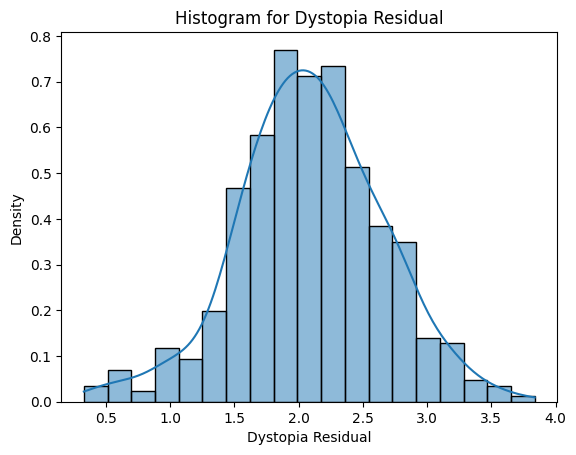

In [29]:
sns.histplot(df_combined['Dystopia Residual'], kde=True, stat='density')
plt.title('Histogram for Dystopia Residual')
plt.show()

# Normal distribution means that Mean imputation can solve our null problem since I would prefer to not drop it yet. 

Reminder: what is 'Dystopia Residual'?

In the context of the World Happiness Report, "Dystopia Residual" is a hypothetical country used as a benchmark to which all other countries are compared when calculating the Happiness Score.
It represents the lowest possible happiness score a country could achieve, and it serves as a reference point for measuring the relative happiness levels of other countries.

The Dystopia Residual is determined by considering various factors that contribute to unhappiness, and it helps to standardize the happiness scores across different countries. 
Essentially, it provides a baseline against which the happiness of real countries is evaluated in the report. 
The lower a country's Happiness Score compared to the Dystopia Residual, the higher its relative happiness level.

For now, I've decided to keep it in even though I an skeptical of what value DR has in our model. Our unsupervised ML work later might answer this.

In [30]:
df_combined['Dystopia Residual'] = df_combined['Dystopia Residual'].fillna(df_combined['Dystopia Residual'].mean(skipna=True))

# Trust only has one null but I'll check it anyways.
df_combined['Trust'].describe()

count    765.000000
mean       0.150442
std        0.123287
min        0.000000
25%        0.061000
50%        0.109000
75%        0.206460
max        0.838075
Name: Trust, dtype: float64

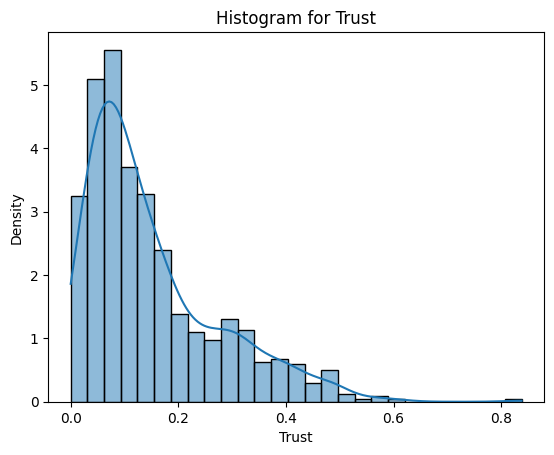

In [31]:
sns.histplot(df_combined['Trust'], kde=True, stat='density')
plt.title('Histogram for Trust')
plt.show()

In [32]:
# Positive skew so median imputation for trust. 
df_combined['Trust'] = df_combined['Trust'].fillna(df_combined['Trust'].median(skipna=True))

df_combined.isnull().sum()

Country              0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [33]:
# Nulls sorted. Now I can proceed with other EDA activities.

df_combined.dtypes

Country               object
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

In [34]:
# Just had a thought, our objective is to create an optimal model to predict happiness score, not happiness score by country 
# so I don't see why we should keep 'country' as an input feature.

df_combined.drop(['Country'], axis=1, inplace=True)
df_combined.columns

Index(['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

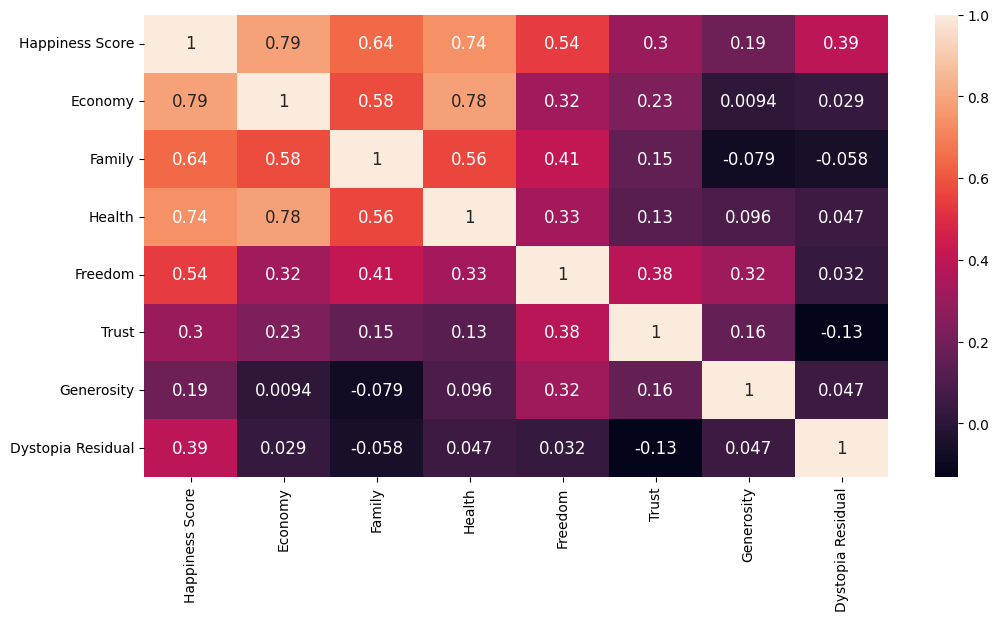

In [35]:
float_cols = df_combined.select_dtypes(include=["float64"])
corr_matrix = float_cols.corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'fontsize': 12})
plt.show()

Noted some high correlations, can try Ridge Regression (L2) later to see if this significantly affects model performance. 

In [36]:
# Vaish kept mentioning clustering so I think I'm supposed to do K-means clustering as my unsupervised ML component here instead of my original plan to do PCA. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined) # Standardizing the data in the current dataframe.
df_scaled[0] # Shows me the first row of standardized data

array([1.96111501, 1.18722402, 0.82273113, 1.32313353, 1.67840716,
       2.18777911, 0.86244879, 0.96891284])

In [37]:
from sklearn.cluster import KMeans

k_means_model = KMeans(n_clusters=2) # Data split into two clusters, following from Vaish' example. Elbow plot later on confirms 2 or 3 as optimal.
k_means_model.fit(df_scaled) # fit the k-means model to the standardized data 

cluster_labels = k_means_model.predict(df_scaled) # the predict method is applied to the standardized dataframe which assigns each data point to a cluster. 
cluster_labels

C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
# Adding the clusters to dataframe as new column
df_scaled = pd.DataFrame(df_scaled, columns=['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust','Generosity', 'Dystopia Residual'])
df_scaled['Cluster'] = cluster_labels

In [39]:
df_scaled.describe().round(2)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Cluster
count,766.00,766.00,766.00,766.00,766.00,766.00,766.00,766.00,766.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.44
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50
min,-2.40,-2.27,-3.32,-2.49,-2.73,-1.22,-1.60,-4.01,0.00
25%,-0.78,-0.76,-0.65,-0.69,-0.67,-0.73,-0.77,-0.28,0.00
50%,-0.06,0.16,0.13,0.14,0.12,-0.34,-0.13,0.00,0.00
75%,0.71,0.79,0.76,0.79,0.79,0.45,0.55,0.26,1.00
max,2.12,2.92,1.73,2.13,2.07,5.58,5.21,3.97,1.00


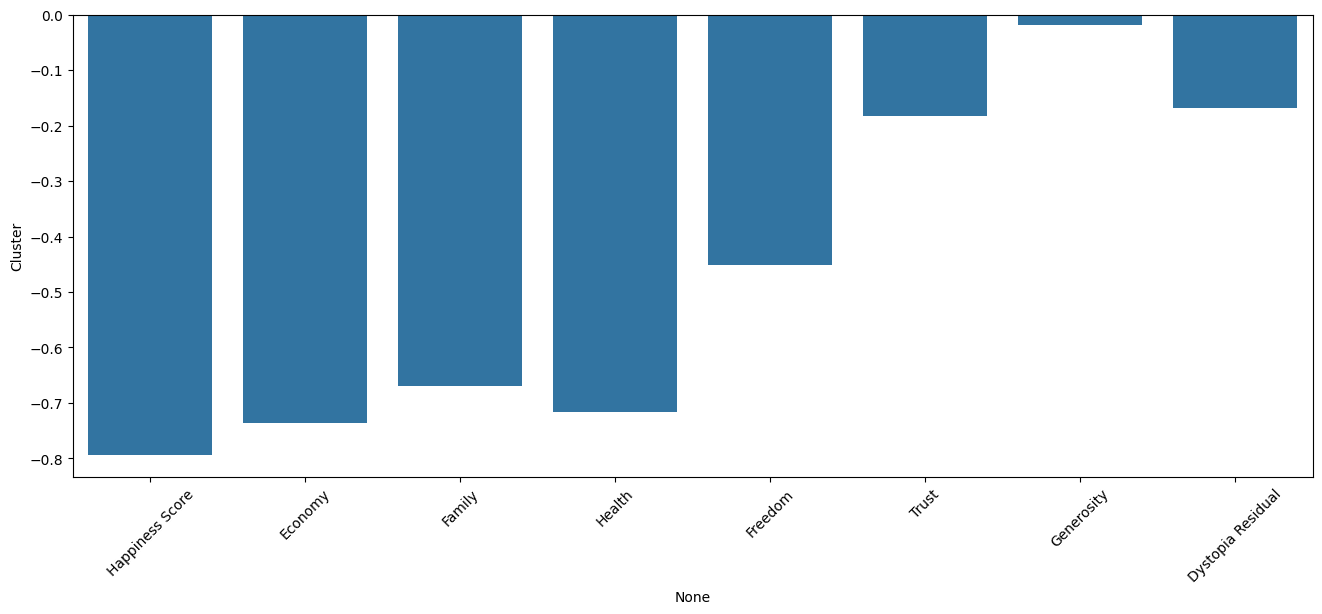

In [40]:
# Using Seaborn to plot correlations between features and clusters.
plt.figure(figsize=(16, 6))
sns.barplot(x=df_scaled.corr()['Cluster'].index[:-1], y=df_scaled.corr()['Cluster'].iloc[:-1])
plt.xticks(rotation=45)
plt.show()

Might be worth removing Generosity. Everything else except DR strongly correlated with 'Cluster'.

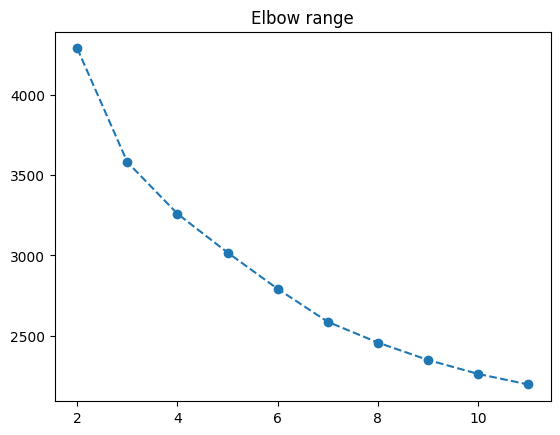

In [41]:
# Elbow method for optimal number of clusters. Should have done this before, but oh well! 
ssd = [] # sum of squared distances 

for k in range(2,12):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_scaled)
    ssd.append(model.inertia_) # cluster center
    

# ssd.append = appends the sum of squared distances for the fitted model to the ssd list. 
# The inertia_ attribute of the k-means model represents the sum of squared distances of samples to their closest cluster center.

plt.plot(range(2,12), ssd, "o--") # chose 2 clusters to 12 clusters as range because clusters = 2, 12 was arbitrary.
# The "o--" format specifies that the points will be marked with circles and connected with a dashed line.
plt.title("Elbow range")
plt.show()


In [42]:
# Okay, so 2 or 3 K-clusters is optimal so could change to 3. I retested the cluster/feature correlation with 3 clusters but the results were almost identical so will stay at 2 for time's sake.

In [62]:
# Scaled data MLR to compare scaled vs raw data for predicting happiness scores to assess impact of scaling on predictability 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_scaled.drop(['Happiness Score'], axis=1) 
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_test = model_1.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08658275096334787
R-squared: 0.9174449648183611


91.74% of the variance in the target variable is explained by the model, indicating a good fit.

In this case, the MSE is approximately 0.1088, indicating a relatively small average squared difference between actual and predicted values.

# Reminder for Me #

R-squared (R^2): R-squared is a measure of how well the regression model explains the variability in the dependent variable. It represents the proportion of variance in the dependent variable that is predictable from the independent variables, with higher values (closer to 1) indicating a better fit.

Mean Squared Error (MSE): Mean Squared Error measures the average squared difference between the actual and predicted values in a regression model. A lower MSE indicates that the model's predictions are closer to the actual values, reflecting better accuracy in prediction.



In [44]:
# RAW DATASET # 
X = df_combined.drop(['Happiness Score'], axis=1) 
y = df_combined['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred_test_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred_test_2)
r2_2 = r2_score(y_test, y_pred_test_2)

print(f"Mean Squared Error: {mse_2}")
print(f"R-squared: {r2_2}")

Mean Squared Error: 0.11203859924693778
R-squared: 0.9150235786707359


mse = 0.1137 = significantly higher, so although the model is technically less accurate, overfitting isn't as much of a concern now.

R^2 = 0.9137 = 91.37% of variance in 'Happiness Score' explained by my input features, meaning it's a very good model. 

If I want to improve it further, I may drop 'Generosity' since it seemed to be the weakest input feature. Then 'Dystopia Residual' after that.  

In summary, the new results are more in line with typical expectations for a linear regression model, suggesting a strong fit without the anomalies observed in the previous model that used the scaled data.

I suppose what I could do next is redo my model by only using the 2015-2017 dataframes, then see if a model based only on those can accurately predict the happiness scores in the other 2018 and 2019 dataframes? I presume this would be possible by reimporting the original datasets, concatenating 2015-2017, then doing the same EDA as before, then writing a model that tests its predictions against the scores in 2018 and 2019 because from the model's perspective, this would be predicting new data that it hasn't seen before. 
I was going to have a crack at this but then ran out of time for the day (EOD Friday at time of writing).

In [45]:
# Start of Day 15/01/2024 # Let's do what I suggested above. # 
df_2015_2 = pd.read_csv('2015.csv')
df_2016_2 = pd.read_csv('2016.csv')
df_2017_2 = pd.read_csv('2017.csv')

df_2015_2.drop(['Region', 'Standard Error', 'Happiness Rank', 'Country'], axis=1, inplace=True)
df_2016_2.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness Rank', 'Country'], axis=1, inplace=True)
df_2017_2.drop(['Whisker.low', 'Whisker.high', 'Happiness.Rank', 'Country'], axis=1, inplace=True)

print(f'2015 dataframe columns: ', df_2015_2.columns)
print(f'2016 dataframe columns: ', df_2016_2.columns)
print(f'2017 dataframe columns: ', df_2017_2.columns)

2015 dataframe columns:  Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 dataframe columns:  Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 dataframe columns:  Index(['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [46]:
df_2015_2.columns = ['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
df_2016_2.columns = ['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
df_2017_2.columns = ['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

df_combined_2 = pd.concat([df_2015_2, df_2016_2, df_2017_2], ignore_index=True) 

df_combined_2.drop_duplicates(inplace=True)
df_combined_2.head(5)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [47]:
df_combined_2.isnull().sum()

Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [48]:
df_combined_2.shape

(470, 8)

In [61]:
# Right, so Python's telling me that I can't complete my proposed plan because 2015-2017 and 2018-2019 have a different number of samples (rows of data) so it's refusing to do the regression.
# I had a look at if there was a way to override this, but Google tells me this is a very bad idea because it'll result in a crap predictive model.  

In [50]:
# Can't do AUC-ROC or Confusion Matrix on Continuous data without data conversion, so moving onto other regression models to have a look at how they do. 

Now I'm going to try a Ridge (L2) and then Lasso Regression (L1) 

# Reminder to self #

"Lasso regression, with L1 regularization, encourages sparsity in the model by driving some coefficients to precisely zero, facilitating automatic feature selection and simpler model interpretation. 
Ridge regression, employing L2 regularization, mitigates multicollinearity by shrinking all coefficients (but not to zero), providing a balance between fitting the data and preventing overfitting."

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] # Scaled data should always be compared to scaled data, remember this for next time. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23) 

# Create the Ridge regression model
model_ridge = Ridge(alpha=0.05) # I chose 0.05 because this is the alpha level I'm used to from psych work where alpha = 0.05 is the default.

# Training the Ridge model on the training set
model_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_ridge = model_ridge.predict(X_test)

# Evaluate the Ridge model performance
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")

Mean Squared Error (Ridge): 0.08658146868855725
R-squared (Ridge): 0.9174461874434138


As far as I can tell, doing L2 Reg did not change much for our model's performance. Let's try Lasso (L1) instead. 

In [52]:
from sklearn.linear_model import Lasso

X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

alpha = 0.05
model_lasso = Lasso(alpha=alpha)

# Training the Lasso model on the training set
model_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_lasso = model_lasso.predict(X_test)

# Evaluate the Lasso model performance
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"R-squared (Lasso): {r2_lasso}")

Mean Squared Error (Lasso): 0.10108987698994354
R-squared (Lasso): 0.9036126912282432


A lasso regression slightly increases MSE and decreases R^2 so it technically decreases model performance but not by much. 

In [53]:
# Gonna try a Gradient Booster Regression because why not? #

from sklearn.ensemble import GradientBoostingRegressor

X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# How to make the Gradient Boosting regression model
model_gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=23) # Sane ones I used in the Housing ML dataset.

# Train the Gradient Boosting model on the training set
model_gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_gradient_boosting = model_gradient_boosting.predict(X_test)

# Evaluate the Gradient Boosting model performance
mse_gradient_boosting = mean_squared_error(y_test, y_pred_test_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_test_gradient_boosting)

print(f"Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}")
print(f"R-squared (Gradient Boosting): {r2_gradient_boosting}")

Mean Squared Error (Gradient Boosting): 0.10164087809235164
R-squared (Gradient Boosting): 0.9030873219729549


# Again, not much better. What if I throw Grid Search at it to see if I can do gradient boosting better? # 

In [54]:
from sklearn.model_selection import GridSearchCV

X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Defining the parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
} # I chose these because they're the commonly-done ones but I can probably think of my own when I'm more experienced. 

# Create Gradient Boosting regression model with 5 splits/folds:
model_gradient_boosting = GradientBoostingRegressor(random_state=23)
grid_search = GridSearchCV(model_gradient_boosting, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # optimizes for lowest mean standard error. 
# n_jobs=-1 means this programme can use all my CPU cores for faster execution.

grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_test_gradient_boosting = best_model.predict(X_test)

# Evaluate the best model's performance
mse_gradient_boosting = mean_squared_error(y_test, y_pred_test_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_test_gradient_boosting)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}")
print(f"R-squared (Gradient Boosting): {r2_gradient_boosting}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (Gradient Boosting): 0.10164087809235164
R-squared (Gradient Boosting): 0.9030873219729549


In [55]:
# Rerunning the GBR with the recommended HPs #
X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# How to make the Gradient Boosting regression model
model_gradient_boosting = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=23)

# Train the Gradient Boosting model on the training set
model_gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_gradient_boosting = model_gradient_boosting.predict(X_test)

# Evaluate the Gradient Boosting model performance
mse_gradient_boosting = mean_squared_error(y_test, y_pred_test_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_test_gradient_boosting)

print(f"Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}")
print(f"R-squared (Gradient Boosting): {r2_gradient_boosting}")

Mean Squared Error (Gradient Boosting): 0.09904194531118614
R-squared (Gradient Boosting): 0.9055653558168398


Again, very small difference made. Gonna try Random Forest next because I've gone mad with regression. 

In [56]:
from sklearn.ensemble import RandomForestRegressor
X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Creating the Random Forest regression model
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=23)

# Train the Random Forest model on the training set
model_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_random_forest = model_random_forest.predict(X_test)

# Evaluate the Random Forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_test_random_forest)
r2_random_forest = r2_score(y_test, y_pred_test_random_forest)

print(f"Mean Squared Error (Random Forest): {mse_random_forest}")
print(f"R-squared (Random Forest): {r2_random_forest}")

Mean Squared Error (Random Forest): 0.11270282677751056
R-squared (Random Forest): 0.8925399606022432


Random Forest gives a small increase in MSE and small decrease in R^2, so not our best tool. I thought about Support Vector Regression but Google tells me that's meant for non-linear relationships... oh sod it let's do it anyway and see if Python hates me for it or not. 

In [57]:
from sklearn.svm import SVR

# Assuming X is your feature matrix and y is your target variable
X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# You then need to standardize the X_test and X_train features using a scaler which is needed for SVR, but I don't because I already scaled X earlier. 

# Create Support Vector Regression model
model_svr = SVR(kernel='linear') # I chose linear 
model_svr.fit(X_train, y_train)
y_pred_test_svr = model_svr.predict(X_test)


mse_svr = mean_squared_error(y_test, y_pred_test_svr)
r2_svr = r2_score(y_test, y_pred_test_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")

print(f"Raw Mean Squared Error: {mse_2}")
print(f"Raw R-squared: {r2_2}")

print(f"Scaled Mean Squared Error: {mse}")
print(f"Scaled R-squared: {r2}")

print(f"Mean Squared Error (Random Forest): {mse_random_forest}")
print(f"R-squared (Random Forest): {r2_random_forest}")

print(f"Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}")
print(f"R-squared (Gradient Boosting): {r2_gradient_boosting}")

Mean Squared Error (SVR): 0.08670064165221165
R-squared (SVR): 0.9173325582494031
Raw Mean Squared Error: 0.11203859924693778
Raw R-squared: 0.9150235786707359
Scaled Mean Squared Error: 0.10884608174652796
Scaled R-squared: 0.9174449648183611
Mean Squared Error (Random Forest): 0.11270282677751056
R-squared (Random Forest): 0.8925399606022432
Mean Squared Error (Gradient Boosting): 0.09904194531118614
R-squared (Gradient Boosting): 0.9055653558168398


Huh, SVR actually has the lowest MSE and the highest R^2 out of the new regressions, but the original Scaled linear regression still reigns supreme in terms of accuracy. 

This means that doing clustering and adding it to my scaled dataframe as a feature did improve my regression model albeit only by a small margin but depending on the nature of the project, a small improvement might still be a huge success depending on how precise and accurate the model needs to be for its intended purpose. 

In [58]:
df_scaled.drop(['Generosity'], axis=1)

,Happiness Score,Economy,Family,Health,Freedom,Trust,Dystopia Residual,Cluster
0,1.961115,1.187224,0.822731,1.323134,1.678407,2.187779,0.968913,0
1,1.937926,0.953722,0.984756,1.349076,1.434563,-0.072584,1.388847,0
2,1.907602,1.011137,0.856753,1.052825,1.571129,2.705828,0.911278,0
3,1.903142,1.342140,0.765691,1.095604,1.705972,1.743145,0.850481,0
4,1.818413,1.013145,0.740059,1.178246,1.462393,1.455169,0.819662,0
...,...,...,...,...,...,...,...,...
761,-1.791049,-1.563306,0.249528,-0.613137,-1.784248,-0.595993,0.000000,1
762,-1.832076,-1.384814,-1.139608,-0.002020,0.945748,2.116475,0.000000,1
763,-1.923940,-1.094765,-0.604852,-0.467440,0.031332,-0.027511,0.000000,1
764,-1.948913,-1.407126,-1.735830,-1.025945,-2.731796,-1.018293,0.000000,1


In [59]:
# Now let's try the scaled data regression with 'Generosity' taken out. 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_scaled.drop(['Happiness Score'], axis=1)
y = df_scaled['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)
y_pred_test_4 = model_4.predict(X_test)

mse_4 = mean_squared_error(y_test, y_pred_test_4)
r2_4 = r2_score(y_test, y_pred_test_4)

print(f"Scaled Mean Squared Error without Generosity: {mse_4}")
print(f"Scaled R-squared without Generosity: {r2_4}")

Scaled Mean Squared Error without Generosity: 0.08658275096334787
Scaled R-squared without Generosity: 0.9174449648183611


The original scaled model scores below:

Scaled Mean Squared Error: 4.493077329737068e-31
Scaled R-squared: 0.9165728348203299

The updated one with generosity taken out: 

Scaled Mean Squared Error without Generosity: 0.08658275096334785
Scaled R-squared without Generosity: 0.9174449648183611

No improvement by removing Generosity, MSE actually increased.  

Suggestions: to come. 

In [60]:
df_combined.to_csv('C:\\Users\\olive\\Documents\\analytics\\week 6\\combined_happiness_complete.csv')
df_scaled.to_csv('C:\\Users\\olive\\Documents\\analytics\\week 6\\scaled_combined_happiness.csv')